<a href="https://colab.research.google.com/github/HYLee810/projectmanager/blob/main/%EB%A6%AC%ED%8A%AC%EA%B4%80%EB%A0%A8_%ED%8A%B9%ED%97%88_%EB%B9%88%EB%8F%84%EB%8B%A8%EC%96%B4_%EB%B0%8F_%EC%9C%A0%EC%82%AC%EB%8B%A8%EC%96%B4_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 빈도수 확인

In [1]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 33.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=1606a0acd11f7ec59e8631daebe64daa35a0dd7c09b96b0b255f93f3c872b3c6
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [3]:
import pandas as pd
df = pd.read_excel('./sample_data/patents.xls')
df.head()

,대표도면,출원번호,abstract,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020150053077,리튬 이차 전지의 제조 방법(Method of manufacturing lithiu...,Method of manufacturing lithium secondary battery,등록,H01M 10/04|H01M 4/04|H01M 4/80|H01M 4/62|H01M ...,주식회사 리튬플러스,이재화,주승기,2015.04.15,1.017533e+12,2017.06.27,1.020160e+12,2016.10.25
1,NaN,1020217028778,고용량 유지율 리튬 이온 전지의 충방전 방식(CHARGING AND DISCHARG...,CHARGING AND DISCHARGING METHOD FOR HIGH-CAPAC...,공개,H01M 10/44|H01M 10/0525,저지앙 펀리튬 뉴 에너지 테크 컴퍼니 리미티드,이정현,쉬 시아오시옹|추이 옌밍|황 위엔치아오,2019.06.22,NaN,NaN,1.020210e+12,2021.10.27
2,NaN,1020217027772,혼합 고액 전해질 리튬 축전지(HYBRID SOLID-LIQUID ELECTROLY...,HYBRID SOLID-LIQUID ELECTROLYTE LITHIUM STORAG...,공개,H01M 10/056|H01M 10/0585|H01M 10/052,저지앙 펀리튬 뉴 에너지 테크 컴퍼니 리미티드,이정현,쉬 지아오시옹|딩 차오|장 용롱|장 잔잔,2019.06.22,NaN,NaN,1.020210e+12,2021.10.27
3,NaN,1020217028777,리튬 이온 전지 및 그 제조 방법과 충방전 방식(LITHIUM ION BATTERY...,LITHIUM ION BATTERY WITH HIGH CAPACITY RETENTI...,공개,H01M 10/058|H01M 4/133|H01M 10/42|H01M 10/44|H...,저지앙 펀리튬 뉴 에너지 테크 컴퍼니 리미티드,이정현,쉬 시아오시옹|추이 옌밍|황 위엔치아오,2019.06.22,NaN,NaN,1.020210e+12,2021.10.27
4,NaN,1020217033601,인쇄된 리튬 포일 및 필름(PRINTED LITHIUM FOIL AND FILM),PRINTED LITHIUM FOIL AND FILM,공개,H01M 4/134|H01M 4/38|H01M 4/62|H01M 4/1395|H01...,리벤트 유에스에이 코포레이션,리앤목특허법인,야코블레바 마리나|피치 케네스 브라이언|그리터 윌리엄 아서|시아 지안,2019.09.18,NaN,NaN,1.020210e+12,2021.11.22


In [4]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
  for token in kiwi.tokenize(text):
    if token.tag in {'NNG', 'NNP'}:
       yield token.form # 형태소 분석

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10) # min_df=10 : 최소 10건의 특허에 나온 단어만 사용하겠다
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [6]:
word_count = pd.DataFrame({
    'word': cv.get_feature_names_out(), # 각 단어별 빈도수
    'count': dtm.sum(axis=0).flat # 각 문서에서 나온 빈도수 합하라
})

In [7]:
word_count.sort_values('count', ascending=False).head(20)

,word,count
0,리튬,37
1,방법,25
2,제조,17


In [ ]:
# 단어별 유사도 계산

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, random_state=1234) # LSA(토픽모델링 방법) -> SVD(수학적 방법)
doc_emb = svd.fit_transform(dtm)

In [11]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
doc_id = 0
sims = cosine_distances(doc_emb[[doc_id]], doc_emb).flatten() # 유사도 계산
sim_idx = np.argsort(sims)[:10] # 비슷한 순으로 정렬해서 가장 비슷한 것 10개

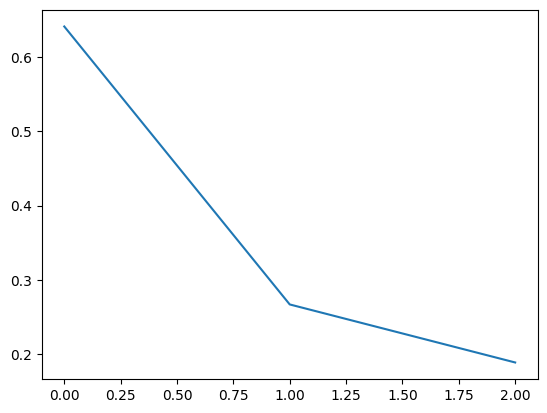

In [12]:
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)


In [13]:
sim_idx

array([ 0, 25, 16, 15, 13,  6, 14, 29,  3,  9])

In [14]:
df.iloc[sim_idx]

,대표도면,출원번호,abstract,발명의명칭(영문),상태,IPC분류,출원인,대리인,발명자,출원일자,등록번호,등록일자,공개번호,공개일자
0,NaN,1020150053077,리튬 이차 전지의 제조 방법(Method of manufacturing lithiu...,Method of manufacturing lithium secondary battery,등록,H01M 10/04|H01M 4/04|H01M 4/80|H01M 4/62|H01M ...,주식회사 리튬플러스,이재화,주승기,2015.04.15,1.017533e+12,2017.06.27,1.020160e+12,2016.10.25
25,NaN,1020110014819,비수계 리튬이차전지용 양극재료 및 그의 제조 방법(Positive compositi...,Positive composition for Lithium secondary bat...,소멸,C01G 45/12|H01M 4/505|H01M 4/485|H01M 10/0525,한국전자기술연구원|에스케이씨 주식회사,박종한,송준호|정태규|김영준|장재혁|이재룡|배근택,2011.02.18,1.012505e+12,2013.03.28,1.020120e+12,2012.08.28
16,NaN,1020067008752,메틸리튬 제조방법(Process for Preparing Methyllithium),Process for Preparing Methyllithium,등록,C01D 15/00|C09K 3/00,록우드 리튬 잉크,박원용|최재희,"힌체, 마크 제이|웬, 징 큐",2004.09.22,1.007268e+12,2007.06.04,1.020060e+12,2006.10.16
15,NaN,1020207019384,리튬 카보네이트의 제조방법(Processes for preparing lithium...,Processes for preparing lithium carbonate,등록,C01D 15/08|C25B 1/04|C25B 13/04|B01D 61/42|B01...,네마스카 리튬 인코포레이션,이원희,"보라사, 기|피어스, 개리|매키, 스티븐, 찰스|글라드코바스, 미콜라스|시몬스, 피...",2014.10.23,1.021959e+12,2020.12.21,1.020200e+12,2020.07.14
13,NaN,1020167013647,리튬 카보네이트의 제조방법(Processes for preparing lithium...,Processes for preparing lithium carbonate,등록,C01D 15/08|C25B 1/04|C25B 13/04|B01D 61/42|B01...,네마스카 리튬 인코포레이션,이원희,"보라사, 기|피어스, 개리|매키, 스티븐, 찰스|글라드코바스, 미콜라스|시몬스, 피...",2014.10.23,1.021325e+12,2020.07.03,1.020160e+12,2016.06.29
6,NaN,1020227032061,리튬 카보네이트의 제조방법(Processes for preparing lithium...,Processes for preparing lithium carbonate,공개,C25B 1/14|C25B 1/16|C25B 9/19|C25B 15/031|C25B...,네마스카 리튬 인코포레이션,이원희,"보라사, 기|피어스, 개리|매키, 스티븐, 찰스|글라드코바스, 미콜라스|시몬스, 피...",2014.10.23,NaN,NaN,1.020220e+12,2022.09.29
14,NaN,1020207036715,리튬 카보네이트의 제조방법(Processes for preparing lithium...,Processes for preparing lithium carbonate,등록,C01D 15/08|C25B 1/04|C25B 13/04|B01D 61/44|B01...,네마스카 리튬 인코포레이션,이원희,"보라사, 기|피어스, 개리|매키, 스티븐, 찰스|글라드코바스, 미콜라스|시몬스, 피...",2014.10.23,1.024457e+12,2022.09.16,1.020200e+12,2020.12.30
29,NaN,1020227039911,초박형 리튬막 복합체 및 이의 제조 방법(ULTRATHIN LITHIUM FILM ...,ULTRATHIN LITHIUM FILM COMPOSITE AND PREPARATI...,공개,H01M 4/38|H01M 10/0567|H01M 4/04|H01M 4/1395,"차이나 에너지 리튬 코., 엘티디",특허법인가산,"선, 자오용|후안, 칭나|한, 시우나|콩, 데위",2021.12.16,NaN,NaN,1.020230e+12,2023.02.20
3,NaN,1020217028777,리튬 이온 전지 및 그 제조 방법과 충방전 방식(LITHIUM ION BATTERY...,LITHIUM ION BATTERY WITH HIGH CAPACITY RETENTI...,공개,H01M 10/058|H01M 4/133|H01M 10/42|H01M 10/44|H...,저지앙 펀리튬 뉴 에너지 테크 컴퍼니 리미티드,이정현,쉬 시아오시옹|추이 옌밍|황 위엔치아오,2019.06.22,NaN,NaN,1.020210e+12,2021.10.27
9,NaN,1020220088189,"리튬 추출 방법, 이를 이용한 탄산리튬 제조 방법 및 수산화리튬 제조 방법(EXTR...","EXTRACTION METHOD OF LITHIUM, METHOD FOR PREPA...",등록,C22B 26/12|C22B 3/42|C01D 15/02|C01D 15/08,전웅,특허법인아주,전웅,2022.07.18,1.024891e+12,2023.01.11,NaN,NaN


In [ ]:
# 유사도에서 아래와 같은 단어를 찾았다는 가정하에 chatGPT에 투자계획서 작성 요청

윤활유: 리튬을 함유한 리튬 그리스는 자동차 및 산업용 기계의 윤활유로 사용됩니다. 이는 부품의 마모를 줄이고 기계의 수명을 연장하는 데 도움을 줍니다.

의약품: 리튬은 조울증과 같은 정신 질환의 치료에 사용됩니다. 리튬 치료는 정신 안정제로 사용되며 환자의 기분 조절을 개선하는 데 도움을 줄 수 있습니다.

합금 및 금속 가공: 리튬은 알루미늄 합금 제조에 사용됩니다. 이러한 합금은 항공기 및 자동차 부품과 같은 경량 구조물을 만드는 데 사용됩니다.

유리 및 세라믹 제조: 리튬 카보네이트와 리튬 옥사이드는 유리 및 세라믹 제조에 사용됩니다. 이러한 물질은 유리의 내구성을 향상시키고 화학 반응을 조절하는 데 도움을 줍니다.

열파이프: 리튬은 열전도성이 높아 열파이프의 제조에 사용됩니다. 이러한 열파이프는 고온 환경에서 열을 전도하는 데 사용됩니다.

기후 제어 시스템: 리튬 브로마이드는 공기 조화 시스템의 냉매로 사용됩니다. 이러한 물질은 공기를 냉각하고 습도를 제어하는 데 도움을 줍니다.

화약 및 폭약: 일부 화약 및 폭약 제품에 리튬이 사용됩니다. 이러한 화약 및 폭약은 군사 및 산업용으로 사용됩니다.

핵 에너지: 리튬은 핵 에너지 생산에 사용되는 물질 중 하나로, 핵 반응 제어 장치에서 중요한 역할을 합니다.